In [1]:
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

from mne import Epochs,find_events

from eegnb import generate_save_path
from eegnb import generate_save_fn
from eegnb.devices.eeg import EEG
from eegnb.analysis.utils import load_data,plot_conditions,load_csv_as_raw
from eegnb.datasets import fetch_dataset
from eegnb.devices.utils import EEG_INDICES, SAMPLE_FREQS

In [2]:
board_name = 'muse2'
device_name = board_name
experiment = 'auditory_oddball'
subject = 1
session_nb = 5

#ch_ind = EEG_INDICES[device_name]
#sfreq = SAMPLE_FREQS[device_name]

# Create save file name
save_fn = generate_save_fn(board_name, experiment, subject, session_nb)
print(save_fn)


eegnb_data_path = generate_save_path(board_name, experiment, subject, session_nb)



raw = load_data(subject, session_nb, device_name, experiment, replace_ch_names=None, verbose=1, site='all', data_dir=None)
      

#raw = load_data(subject,session_nb,
#                experiment=experiment, device_name=board_name,
#                data_dir = eegnb_data_path)

C:\Users\surya/.eegnb\data\auditory_oddball\local\muse2\subject0001\session005\recording_2020-11-29-19.08.45.csv
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=319872
    Range : 0 ... 319871 =      0.000 ...  1249.496 secs
Ready.
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=319884
    Range : 0 ... 319883 =      0.000 ...  1249.543 secs
Ready.


Effective window size : 8.000 (s)


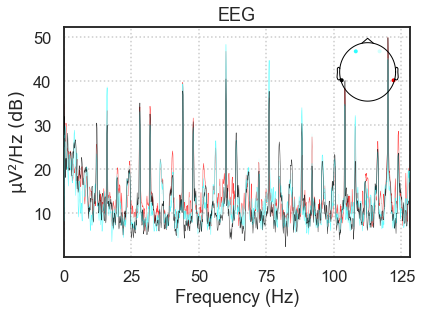

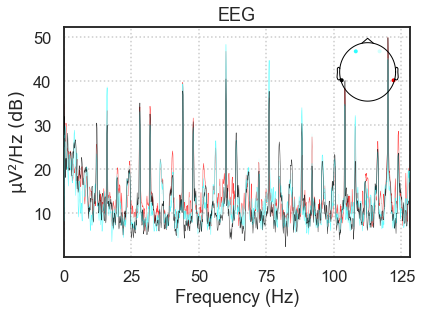

In [3]:
raw.plot_psd()

Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 1 - 30 Hz
Using filter length: 319884

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 8.000 (s)


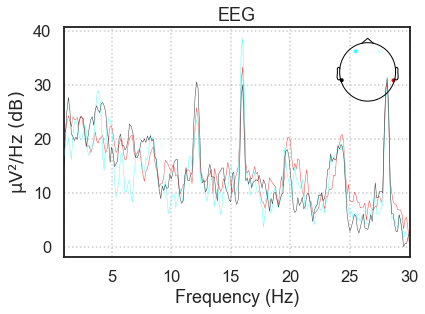

In [4]:
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30);

In [5]:
from mne import merge_events
events = find_events(raw)

3602 events found
Event IDs: [        99     131197     868794 ... 1603020115 1604020115 1605020115]


In [6]:
def permute_events(indexOfInterest):
    low = []
    high = []
    neither = []
    for i in range(444444):
        if len(str(i)) >= indexOfInterest + 1:
            if int(str(i)[indexOfInterest]) == 1 and i >= pow(10, 5 - indexOfInterest) :
                low.append(i)
            elif int(str(i)[indexOfInterest]) == 2 and i >= pow(10, 5 - indexOfInterest) :
                high.append(i)
            elif int(str(i)[indexOfInterest]) == 3 and i >= pow(10, 5 - indexOfInterest) :
                neither.append(i)
            elif int(str(i)[indexOfInterest]) == 4 and i >= pow(10, 5 - indexOfInterest) :
                neither.append(i)
    return low, high, neither




In [7]:
import mne
montage = mne.channels.make_standard_montage("standard_1020")
montage.ch_names

['Fp1',
 'Fpz',
 'Fp2',
 'AF9',
 'AF7',
 'AF5',
 'AF3',
 'AF1',
 'AFz',
 'AF2',
 'AF4',
 'AF6',
 'AF8',
 'AF10',
 'F9',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'F10',
 'FT9',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'FT10',
 'T9',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'T10',
 'TP9',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'TP10',
 'P9',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO9',
 'PO7',
 'PO5',
 'PO3',
 'PO1',
 'POz',
 'PO2',
 'PO4',
 'PO6',
 'PO8',
 'PO10',
 'O1',
 'Oz',
 'O2',
 'O9',
 'Iz',
 'O10',
 'T3',
 'T5',
 'T4',
 'T6',
 'M1',
 'M2',
 'A1',
 'A2']

In [8]:
import numpy as np

arr = np.array(events)

print(arr.shape)

(3602, 3)


In [9]:


def replaceMarkers(events, newMarkers):

    newEvents = events
    j = 0
    for i in range(len(events)):
        if events[i][2] != 99:
            newEvents[i][2] = newMarkers[j]
            j = j + 1
        elif events[i][2] == 99:
            j = 0
            
    return newEvents


def makeoddball(inputs, rep):
    #based on inputs, creating oddball paradigms markers depending on "switch"
    value = inputs[0]
    count = 0
    markerArray = []
    for i in range(len(inputs)):
        if inputs[i] == value:
            count += 1
            if count == rep:
                markerArray.append(1)
            else:
                markerArray.append(3)
        else:
            if count == rep + 1:
                markerArray.append(2)
            
            else:
                markerArray.append(4)
            value = inputs[i]
            count = 1
    return markerArray

def maketonesnums(num):
    newArray = []
    for i in range(num):
        newArray.append(90000+i)
    return newArray   
    
    

In [10]:
import h5py
import numpy as np, pandas as pd

conditions_file = 'MUSE_conditions.mat'

F = h5py.File(conditions_file, 'r')#['museEEG']
highPE = np.squeeze(F['museEEG']['design']['highPE'][:]).astype(int)
lowPE = np.squeeze(F['museEEG']['design']['lowPE'][:]).astype(int)
inputs = np.squeeze(F['museEEG']['design']['inputs'][:]).astype(int)

#based on inputs, creating oddball paradigms markers depending on "switch"
tonenums = maketonesnums(1800)
oddball3 = makeoddball(inputs, 3)
oddball4 = makeoddball(inputs, 4)
oddball5 = makeoddball(inputs, 5)
oddball6 = makeoddball(inputs, 6)

#modifying 0s in PE definitions of tones that represent markers to 3s to avoid loss of trials instead of ignoring them
for i in range(len(highPE)):
    if highPE[i] == 0:
        highPE[i] = 3
    if lowPE[i] == 0:
        lowPE[i] = 3  
           
#1 is standard/bottom, 2 is deviant/high, 3 is "baseline trial"

stim_types = inputs
itis = np.ones_like(inputs)*0.5 

newAdditionalMarkers = [];

for i in range(0, len(highPE)):
    newAdditionalMarker = str(tonenums[i]) + str(oddball3[i]) + str(oddball4[i]) + str(oddball5[i]) + str(oddball6[i]) + str(highPE[i]) + str(lowPE[i])
    newAdditionalMarkers.append(newAdditionalMarker)

additional_labels = {'labels' : newAdditionalMarkers}

In [15]:
newAdditionalMarkers

['90000333333',
 '90001333333',
 '90002444433',
 '90003444433',
 '90004333333',
 '90005133333',
 '90006313333',
 '90007331333',
 '90008333133',
 '90009333313',
 '90010333313',
 '90011333313',
 '90012333313',
 '90013333313',
 '90014333333',
 '90015333333',
 '90016333333',
 '90017333333',
 '90018333333',
 '90019333333',
 '90020333333',
 '90021333333',
 '90022444422',
 '90023444433',
 '90024333333',
 '90025133333',
 '90026313333',
 '90027331333',
 '90028424422',
 '90029444433',
 '90030333333',
 '90031133333',
 '90032313333',
 '90033331333',
 '90034424422',
 '90035444433',
 '90036333333',
 '90037133333',
 '90038313333',
 '90039331333',
 '90040333133',
 '90041442422',
 '90042444433',
 '90043333333',
 '90044444422',
 '90045444413',
 '90046333313',
 '90047133333',
 '90048313333',
 '90049331333',
 '90050333133',
 '90051442422',
 '90052333322',
 '90053444413',
 '90054333313',
 '90055133313',
 '90056313313',
 '90057244422',
 '90058444413',
 '90059333313',
 '90060133313',
 '90061313333',
 '900623

In [16]:
events = replaceMarkers(events, newAdditionalMarkers)

In [17]:
low0, high0, neither0 = permute_events(0)
low1, high1, neither1 = permute_events(1)
low2, high2, neither2 = permute_events(2)
low3, high3, neither3 = permute_events(3)
lllowPe, lllhighPe, llneither = permute_events(4)
hllowPe, hlhighPe, hlneither = permute_events(5)

In [18]:
a = events[0][2]
a

99

In [19]:
for i in range(len(events)):
    events[i][2] = events[i][2] % 1000000
events

array([[   341,      0,     99],
       [  1751,      0, 333333],
       [  1891,      0, 333333],
       ...,
       [578350,      0, 333331],
       [581052,      0, 333331],
       [581193,      0, 333331]], dtype=int64)

sample drop %:  24.73625763464742


<Epochs  |   2711 events (all good), -0.101562 - 0.800781 sec, baseline off, ~19.2 MB, data loaded,
 'Deviant': 48
 'Neither': 2383
 'Standard': 280>

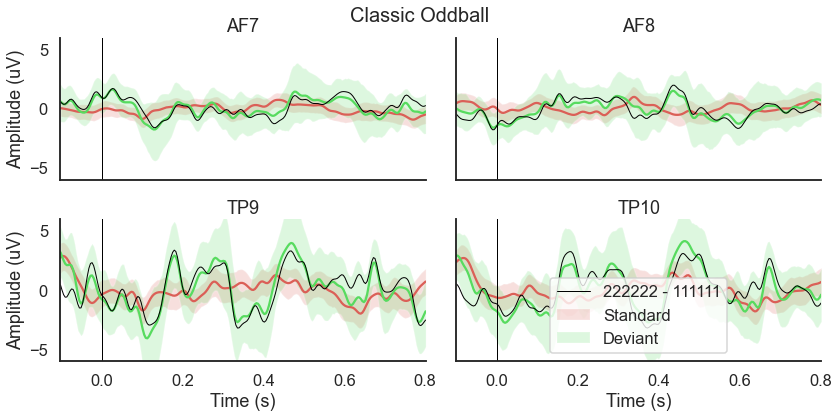

In [20]:
#0 index
cevents = merge_events(events, low0, 111111)
cevents = merge_events(cevents, high0, 222222)
cevents = merge_events(cevents, neither0, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])


conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

In [27]:
epochs.set_montage(montage)
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
ica = ICA(n_components=4, random_state=97)

ica.fit(epochs)

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 4 components
Fitting ICA took 2.0s.


<ICA  |  epochs decomposition, fit (fastica): 648440 samples, 4 components, channels used: "eeg">

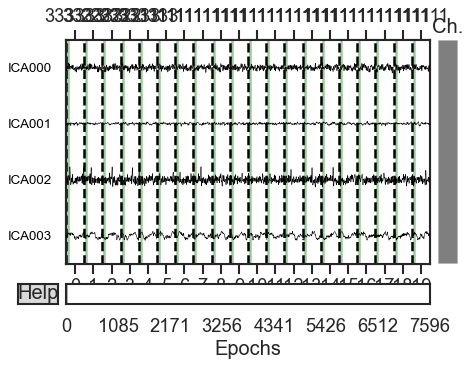

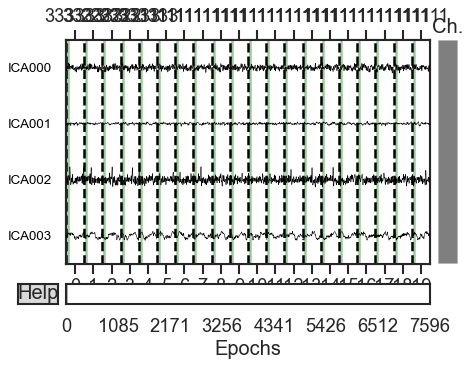

In [13]:
ica.plot_sources(epochs)

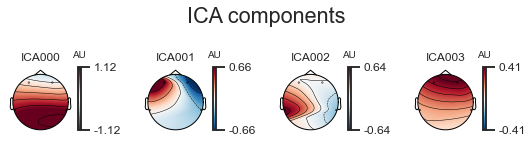

[<Figure size 561.6x169.56 with 8 Axes>]

In [14]:
ica.plot_components(colorbar=True)

sample drop %:  24.73625763464742


<Epochs  |   2711 events (all good), -0.101562 - 0.800781 sec, baseline off, ~19.2 MB, data loaded,
 'Deviant': 22
 'Neither': 2472
 'Standard': 217>

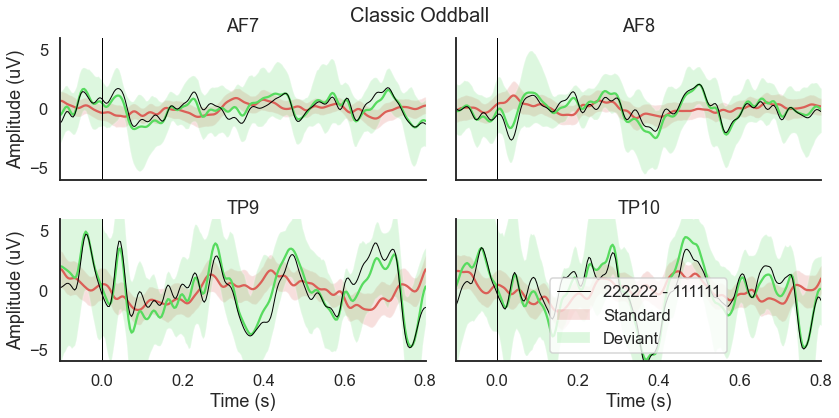

In [21]:
#1 index
cevents = merge_events(events, low1, 111111)
cevents = merge_events(cevents, high1, 222222)
cevents = merge_events(cevents, neither1, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])


conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

In [14]:
ica = ICA(n_components=4, random_state=97)
ica.fit(epochs)
ica.plot_sources(epochs)
ica.plot_components(colorbar=True)

NameError: name 'ica' is not defined

sample drop %:  24.73625763464742


<Epochs  |   2711 events (all good), -0.101562 - 0.800781 sec, baseline off, ~19.2 MB, data loaded,
 'Deviant': 25
 'Neither': 2501
 'Standard': 185>

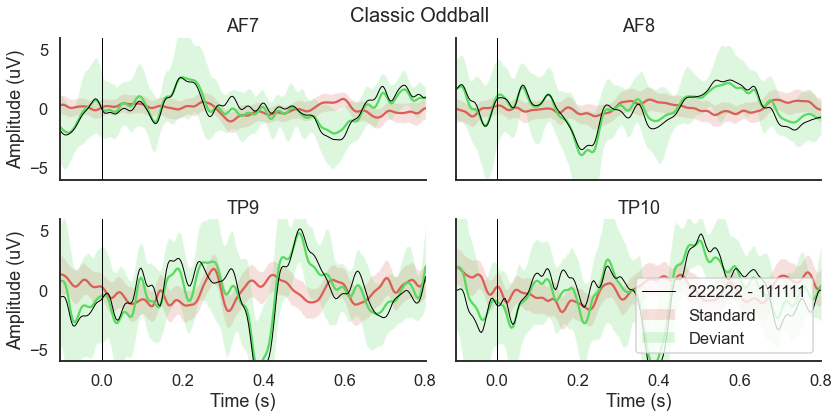

In [22]:
#2 index
cevents = merge_events(events, low2, 111111)
cevents = merge_events(cevents, high2, 222222)
cevents = merge_events(cevents, neither2, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

In [ ]:
ica = ICA(n_components=4, random_state=97)
ica.fit(epochs)
ica.plot_sources(epochs)
ica.plot_components(colorbar=True)

sample drop %:  24.73625763464742


<Epochs  |   2711 events (all good), -0.101562 - 0.800781 sec, baseline off, ~19.2 MB, data loaded,
 'Deviant': 27
 'Neither': 2525
 'Standard': 159>

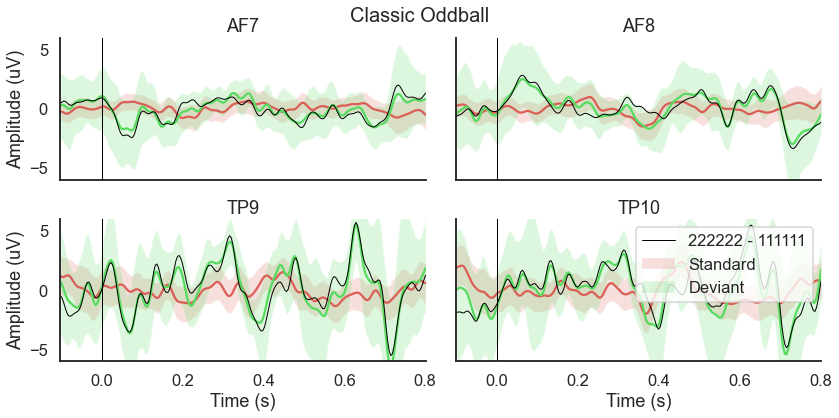

In [23]:
#3 index
cevents = merge_events(events, low3, 111111)
cevents = merge_events(cevents, high3, 222222)
cevents = merge_events(cevents, neither3, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

In [ ]:
ica = ICA(n_components=4, random_state=97)
ica.fit(epochs)
ica.plot_sources(epochs)
ica.plot_components(colorbar=True)

sample drop %:  24.73625763464742


<Epochs  |   2711 events (all good), -0.101562 - 0.800781 sec, baseline off, ~19.2 MB, data loaded,
 'Deviant': 416
 'Neither': 1884
 'Standard': 411>

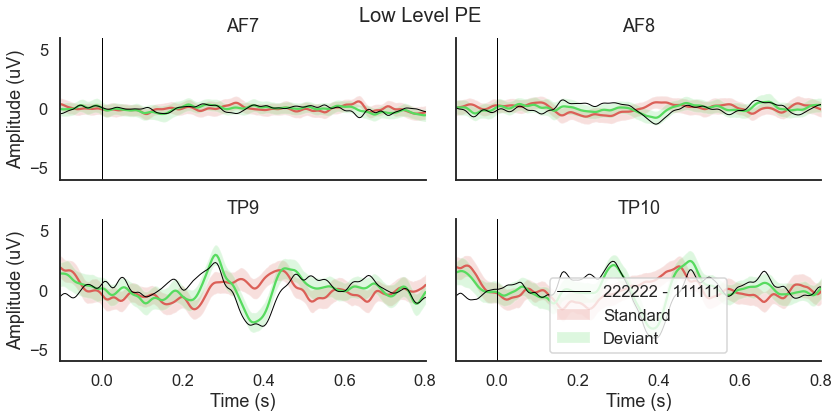

In [24]:
#4 index, low level PE
cevents = merge_events(events, lllowPe, 111111)
cevents = merge_events(cevents, lllhighPe, 222222)
cevents = merge_events(cevents, llneither, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Low Level PE',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

In [ ]:
ica = ICA(n_components=4, random_state=97)
ica.fit(epochs)
ica.plot_sources(epochs)
ica.plot_components(colorbar=True)

sample drop %:  24.73625763464742


<Epochs  |   2711 events (all good), -0.101562 - 0.800781 sec, baseline off, ~19.2 MB, data loaded,
 'Deviant': 420
 'Neither': 1866
 'Standard': 425>

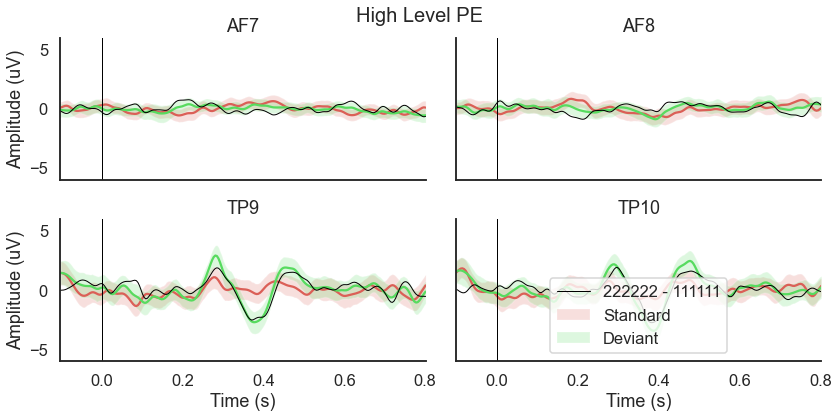

In [25]:
#5 index, high level PE
cevents = merge_events(events, hllowPe, 111111)
cevents = merge_events(cevents, hlhighPe, 222222)
cevents = merge_events(cevents, hlneither, 333333)

event_id = {'Standard': 111111, 'Deviant': 222222, 'Neither': 333333}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [111111]
conditions['Deviant'] = [222222]
#conditions['Neither'] = [333333]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='High Level PE',
                          diff_waveform=(111111, 222222))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

In [ ]:
ica = ICA(n_components=4, random_state=97)
ica.fit(epochs)
ica.plot_sources(epochs)
ica.plot_components(colorbar=True)

In [21]:
cevents = merge_events(events, [1, 2, 10, 20, 22], 1)
cevents = merge_events(cevents, [100, 101, 102, 110, 120, 122], 2)
event_id = {'Standard': 1, 'Deviant': 2}

epochs = Epochs(raw, events=cevents, event_id=event_id,
                tmin=-0.1, tmax=0.8, baseline=None,
                reject={'eeg': 75e-6}, preload=True,
                verbose=False, picks=[0,1,2,3])

conditions = OrderedDict()
conditions['Standard'] = [1]
conditions['Deviant'] = [2]

fig, ax = plot_conditions(epochs, conditions=conditions,
                          ci=97.5, n_boot=1000, title='Classic Oddball',
                          diff_waveform=(1, 2))

print('sample drop %: ', (1 - len(epochs.events)/len(cevents)) * 100)
epochs

ValueError: No matching events found for Standard (event id 1)

In [ ]:
ica = ICA(n_components=4, random_state=97)
ica.fit(epochs)
ica.plot_sources(epochs)
ica.plot_components(colorbar=True)